

#  useful import 
    * note we need the mchlearn package next to the notebook

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import matplotlib as cm
import scipy.stats as st
from mchlearn.plotting import grid
import sys
sys.path.append("mchleaern")
from mchlearn.plotting import confidence_ellipse
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

#  implement the helper function:
    1- read file : read txt file and calculate the some numerical values needed in the processing.
    2- gaussian estimation: calculate the sigma and mus for each class.
    3- distribution_calculation : return the boundary of each class on a scatter plot.
    4- distribution_calculationV2:return the boundary of each class while assuming they have the same variance.
    5- prob_pos_cond_x1x2 : calculate the conditional prob.
    6- boundary_plot : draw the scatter plot with the decision boundary between each class.
    7- evaluation: calculate the accuracy of the classifier.
    
    ** note some functions needed to be duplicated becuase of the referencing in the two cases used in the drawing.

In [ ]:
def read_file(filename,sep,names,classColumn):
    """
    this function takes the file path in the os 
    and read the file in pandas dataframe,also find the number of features to process
    
    Input:
    str file name: the name of the file we need to work on.
    sep : the separator of values (example : , \t ...)
    names: list of feature names
    classColumn: the name of the class column
    Output:
    numberOfClasses: the number of the classes in this dataset
    groups: object contain the groups created by the group by method in order to process each class separately.
    Features: the number of Features in this dataset.
    data: the pandas dataframe containing all the dataset.
    """
    # reading the text file
    data=pd.read_csv(filename,sep=sep,names=names)
    # find the number of classes in this dataset
    numberOfClasses=len(data[classColumn].value_counts().index)
    # separate each class data using the group by to process each class separately
    groups=data.groupby(classColumn)
    # find the number of features in order to be able to create the covariance matrix
    Features=len([col for col in data.columns if col != classColumn])
    
    return numberOfClasses,groups,Features,data
    

In [ ]:
def gaussian_estimation(data,numberOfFeatures):
    """
    This function accepts a numpy matrix which contain the data and return the mean and sigma of the distribution.
    Input:
        data: numpy matrix 
    Output:
        mu : numpy (1D array) vector which holds the mean value of each feature.
        sigma: numpy (2-D array) holds the covariance matrix of the data
    """
    mu = np.mean(data,0)
    sigma = np.cov(data,rowvar=False)
    # since we are assuming feature indepandancy 
    # the covariance is multiplied by I (identity matrix) (naive bayes)
    sigma=sigma*np.eye(numberOfFeatures)
    
    return mu, sigma

In [ ]:
def distribution_calculation(groups,colors,classColumn,numFeatures):
    """
    This method calculate the probability density function of each class,
    also all the statistical analysis needed for each class distribution
    and draw a 2d scatter plot for the distributions of the classes.
    
    Input:
        groups : the pandas object which hold the group frames of each class
        colors: list contain the colors of the classes in the plot
        classColumn: the name of the class column
        numFeatures: the number of features in this dataset in order to calculate the covariance matrix
    
    Output:
    mus: python dictionary contain the name of the class as key and the mues of the features as value
    sigmas: python dictionary contain the name of the class as key and the sigmas of the features as a value
    classes_pdf:python dictionary contain the name of the class as a key and the PDF of each class as a value"""
    
    # dictionary to hold the values of means of the features 
    mus={}
    # dictionary to hold the values of variances of the features
    sigmas={}
    # dictionary to hold the PDF of each class
    classes_pdf={}
    fig, ax = plt.subplots()
    colors=colors
    colors_iterator=0
    # looping over the dataset of each class
    for groupname,group in groups:
        # assign a color for this class on the plot
        color=colors[colors_iterator]
        # find the columns which we need to process (all except the class column)
        cols=[col for col in group.columns if col != classColumn]
        # compute the mean and sigma for each class
        mu,sigma=gaussian_estimation(group[cols].values,numFeatures)
        # store the value of the mean vector in the dictionary
        mus[groupname]=mu
        # store the value of the covariance matrix in the dictionary
        sigmas[groupname]=sigma
        
        # use the calculated mu and sigma to have the PDF  using scipy multivariate_normal
        dist=st.multivariate_normal(mu, sigma)
        # store the pdf of each class
        classes_pdf[groupname]=dist
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        # draw the scatter plot for the class in order to visualize the the data
        ax.scatter(group.x1, group.x2, alpha=0.2,color=color, label='class '+str(groupname));
        # draw the border of each class
        confidence_ellipse(mu, sigma, ax,edgecolor=color)
        ax.legend()
        ax.set_title('the distribution of the classes')
        colors_iterator+=1
    
    return mus,sigmas,classes_pdf

In [ ]:
def distribution_calculationV2(data,groups,colors,classColumn,numFeatures):
    """
    This method calculate the probability density function of each class,
    also all the statistical analysis needed for each class distribution
    and draw a 2d scatter plot for the distributions of the classes.
    
    Input:
        groups : the pandas object which hold the group frames of each class
        colors: list contain the colors of the classes in the plot
        classColumn: the name of the class column
        numFeatures: the number of features in this dataset in order to calculate the covariance matrix
    
    Output:
    mus: python dictionary contain the name of the class as key and the mues of the features as value
    sigmas: python dictionary contain the name of the class as key and the sigmas of the features as a value
    classes_pdf:python dictionary contain the name of the class as a key and the PDF of each class as a value"""
    
    # dictionary to hold the values of means of the features 
    mus={}
    # dictionary to hold the values of variances of the features
    sigmas={}
    # dictionary to hold the PDF of each class
    classes_pdf={}
    fig, ax = plt.subplots()
    colors=colors
    colors_iterator=0
    # looping over the dataset of each class
    for groupname,group in groups:
        # assign a color for this class on the plot
        color=colors[colors_iterator]
        # find the columns which we need to process (all except the class column)
        cols=[col for col in group.columns if col != classColumn]
        # compute the mean and sigma for each class
        mu,sigma=gaussian_estimation(group[cols].values,numFeatures)
        # store the value of the mean vector in the dictionary
        mus[groupname]=mu
        # store the value of the covariance matrix in the dictionary
        totalmu,sigma=gaussian_estimation(data[cols].values,numFeatures)
        sigmas[groupname]=sigma
        
        # use the calculated mu and sigma to have the PDF  using scipy multivariate_normal
        dist=st.multivariate_normal(mu, sigma)
        # store the pdf of each class
        classes_pdf[groupname]=dist
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        # draw the scatter plot for the class in order to visualize the the data
        ax.scatter(group.x1, group.x2, alpha=0.2,color=color, label='class '+str(groupname));
        # draw the border of each class
        confidence_ellipse(mu, sigma, ax,edgecolor=color)
        ax.legend()
        ax.set_title('the distribution of the classes')
        colors_iterator+=1
    
    return mus,sigmas,classes_pdf

In [ ]:
def prob_pos_cond_x1x2(data):
    """
    This function takes the whole data as input and calculate the maximum likelihood of each class 
    
    Input:
        data :numpy 2-d matrix holds the values of the features of the data points which we need to predict

    Output:
        result=numpy array contain the prediction for the first class"""
    p_pos=(classes_pdf[1].pdf(data))
    p_neg=(classes_pdf[-1].pdf(data))
    return p_pos/(p_pos+p_neg)



In [ ]:
def prob_pos_cond_x1x2V2(data):
    """
    This function takes the whole data as input and calculate the maximum likelihood of each class 
    
    Input:
        data :numpy 2-d matrix holds the values of the features of the data points which we need to predict

    Output:
        result=numpy array contain the prediction for the first class"""
    p_pos=(classes_pdf2[1].pdf(data))
    p_neg=(classes_pdf2[-1].pdf(data))
    return p_pos/(p_pos+p_neg)

In [ ]:
def boundary_plot(mus,sigmas,data):
    """This method accepts the data,sigmas and mus to draw the decision boundary betweeen the two classes"""
    
    positiveclass=data.groupby('class').get_group(1)
    negclass=data.groupby('class').get_group(-1)
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.scatter(negclass['x1'].values, negclass['x2'].values, alpha=0.2, c = 'blue', label='class -1');
    ax.scatter(positiveclass['x1'].values, positiveclass['x2'].values, alpha=0.2, c = 'red', label='class 1');
    ax.legend()
    x1s = np.linspace(data.min()['x1'], data.max()['x1'],100)
    x2s = np.linspace(data.min()['x2'],data.max()['x2'], 100)
    confidence_ellipse(mus[-1],sigmas[-1], ax, edgecolor ='blue')
    confidence_ellipse(mus[1], sigmas[1], ax, edgecolor = 'red')
    cs = ax.contour(*grid(x1s,x2s,prob_pos_cond_x1x2), [0.25, 0.5, 0.75], colors=['black','green', 'black']);
    ax.clabel(cs)
    ax.set_title('the distribution of the classes and the decision boundary');

In [ ]:
def boundary_plotV2(mus,sigmas,data):
    """This method accepts the data,sigmas and mus to draw the decision boundary betweeen the two classes"""
    
    positiveclass=data.groupby('class').get_group(1)
    negclass=data.groupby('class').get_group(-1)
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.scatter(negclass['x1'].values, negclass['x2'].values, alpha=0.2, c = 'blue', label='class -1');
    ax.scatter(positiveclass['x1'].values, positiveclass['x2'].values, alpha=0.2, c = 'red', label='class 1');
    ax.legend()
    x1s = np.linspace(-10,40,100)
    x2s = np.linspace(-10,40, 100)
    confidence_ellipse(mus[-1],sigmas[-1], ax, edgecolor ='blue')
    confidence_ellipse(mus[1], sigmas[1], ax, edgecolor = 'red')
    cs = ax.contour(*grid(x1s,x2s,prob_pos_cond_x1x2V2), [0.25, 0.5, 0.75], colors=['black','green', 'black']);
    ax.clabel(cs)
    ax.set_title('the distribution of the classes and the decision boundary');

In [ ]:
def evaluation(df,classes_pdf,prior):
    """
    this function takes the distribution and the prior probability to classify the points and calculate the accuracy score """
    df['p_pos']=(classes_pdf[1].pdf(data[['x1','x2']].values))*prior
    df['p_neg']=(classes_pdf[-1].pdf(data[['x1','x2']].values))*(1-prior)
    df['prediction']=df['p_pos']>df['p_neg']
    df['prediction']=df['prediction'].map({True:1,False:-1})
    
    return accuracy_score(df['class'].values,df['prediction'].values)
    

<br>
<br>
<br>
<br>

# working on the binclass.txt 

first we assume the two classes follow the gaussian distribution with different mean and variance for each class

** note here we also assume that the features are independant.

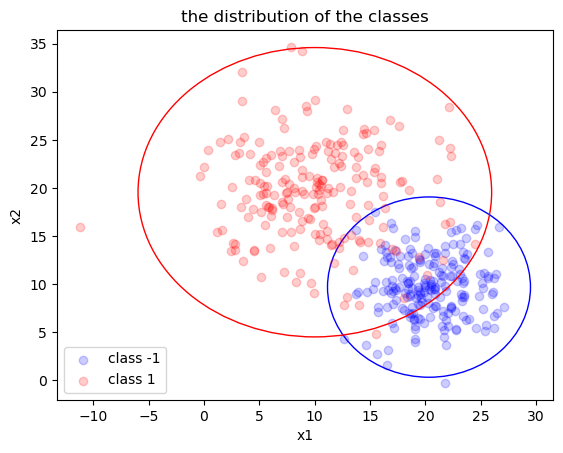

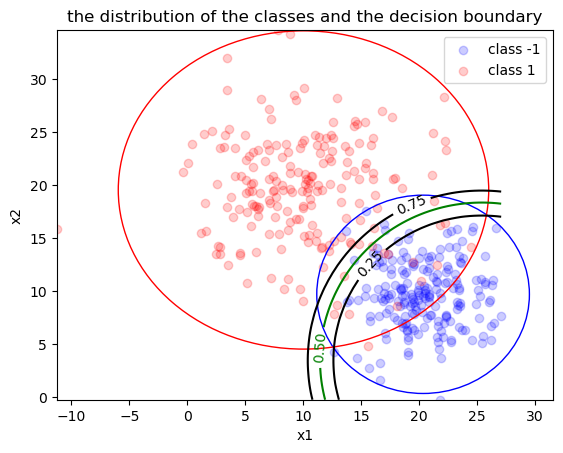

In [ ]:
# experiment 1
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclass.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus,sigmas,classes_pdf=distribution_calculation(groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plot(mus,sigmas,data)

In [ ]:
prior=0.5
# evaluate the model
print('the accuracy ',evaluation(data,classes_pdf,prior))

the accuracy  0.9525


In [ ]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [ ]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[28.34933274, -0.        ],
        [-0.        , 25.12985627]])}

### observation:
    here you can see that each class has its own variance and since the variance of the positive class is much higher than that of the negative class we can see that the positive class dominates most of the feature space thus the decision boundary is in the corner near to the small area where the negative class found.
    also we can see that the accuracy of this classifier with equal prior probabilities approaches 95.25%

# in the second experiment on binclass.txt

    we assume that the two classes have the same variance (the variance of all the data),and each one has its own mean
    let's observe the difference.

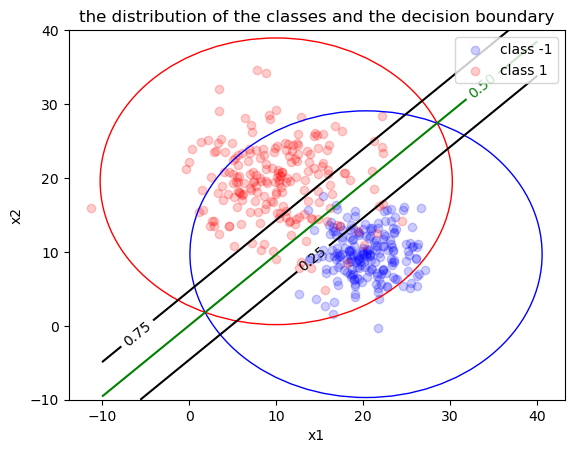

In [ ]:
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclass.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus2,sigmas2,classes_pdf2=distribution_calculationV2(data,groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plotV2(mus2,sigmas2,data)

In [ ]:
prior=0.5
# evaluate the model
print('the accuracy ',evaluation(data,classes_pdf2,prior))

the accuracy  0.95


In [ ]:
mus2

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [ ]:
sigmas2

{-1: array([[45.45607296, -0.        ],
        [-0.        , 41.77266267]]),
 1: array([[45.45607296, -0.        ],
        [-0.        , 41.77266267]])}

### observation:
here you can see that both the classes have the same variance,but different means therefore the decision boundary tends to divide the feature space equally between the two classes. <br/> also we should notice the different scale on the plot of course :) <br>
i mean in the first case where the two class have different variance we have seen that the positive class (having the higher variance) dominate the feature space, while in the second case where both the classes have the same variance we have seen that the feature space is divided equally between them.
aslo notice that the accuracy decreased from 95.25% to  95% because of this assumption

# Working on binclassV2.txt

## experiment one : each class has its own variance

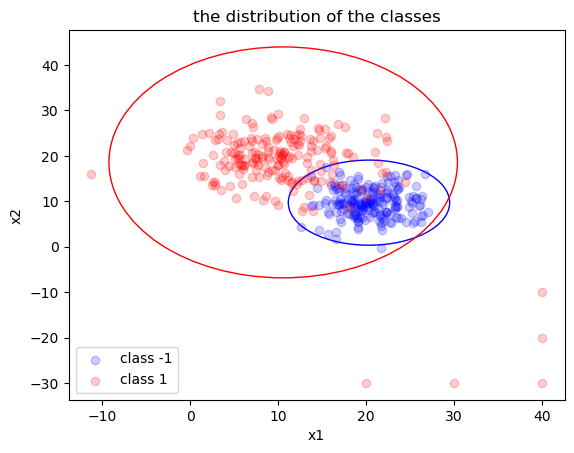

In [ ]:
# experiment 1
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclassV2.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus,sigmas,classes_pdf=distribution_calculation(groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plot(mus,sigmas,data)

In [ ]:
prior=0.5
# evaluate the model
print('the accuracy ',evaluation(data,classes_pdf,prior))

the accuracy  0.955


In [ ]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.57498363, 18.5569005 ])}

In [ ]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[43.56584853, -0.        ],
        [-0.        , 71.78277219]])}

## observation:

it's clear here in the second text file that the distribution of the negative class lies inside the feature space of the positive class so the decision boundary takes the shape of ellipse inside the bigger class (the class with higher variance )

## experiment 2 on the binclassV2

### where the two classes have the same variance which we will assume as the variance of the whole dataset.

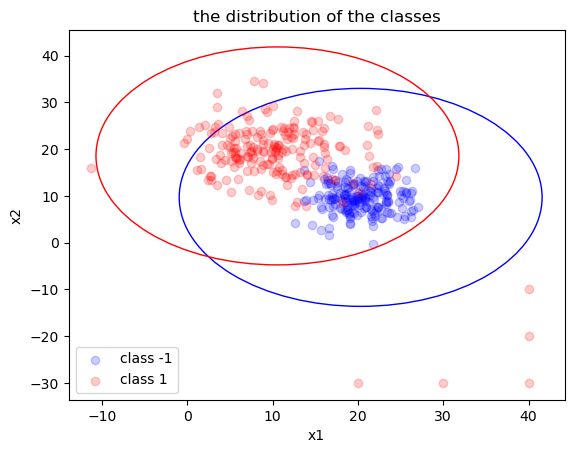

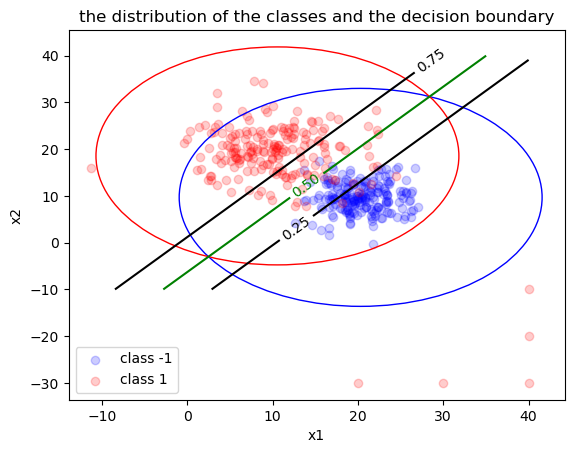

In [ ]:
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclassV2.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus2,sigmas2,classes_pdf2=distribution_calculationV2(data,groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plotV2(mus2,sigmas2,data)

In [ ]:
prior=0.5
# evaluate the model
print('the accuracy ',evaluation(data,classes_pdf2,prior))

the accuracy  0.9375


In [ ]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.57498363, 18.5569005 ])}

In [ ]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[43.56584853, -0.        ],
        [-0.        , 71.78277219]])}

# observation:
here since we also assume that both the classes have the same distribution,therefore the decision boundary tends to be line,divides the feature space between the two classes.
and because of  the six points of the positive class in the bottom right corner the accuracy decrease from 95.5% to 93.75%.